<a href="https://colab.research.google.com/github/ChristopherGG1818/SURFS-PROJECT/blob/main/Surfs_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TA= pd.read_csv('/content/drive/MyDrive/NashvilleAccidents.csv')

In [ ]:
DT= pd.read_csv('/content/drive/MyDrive/Date and Time.csv')

In [ ]:
AC= pd.read_csv('/content/drive/MyDrive/Drivers age and Condition.csv')

In [ ]:
TA.columns

Index(['Accident Number', 'Date and Time', 'Number of Motor Vehicles',
       'Number of Injuries', 'Number of Fatalities', 'Property Damage',
       'Hit and Run', 'Reporting Officer', 'Collision Type Code',
       'Collision Type Description', 'Weather Code', 'Weather Description',
       'Illumination Code', 'Illumination Description', 'Harmful Code',
       'Harmful Description', 'Street Address', 'City', 'State', 'ZIP', 'RPA',
       'Precinct', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

In [ ]:
DT.columns

Index(['Accident Number', 'Date and Time', 'Weather Description', 'Date',
       'Time', 'Month', 'Year', 'Unnamed: 7', 'Month(M)', 'Day(D)', 'Year(Y)'],
      dtype='object')

In [ ]:
AC.columns

Index(['Age', 'Condition'], dtype='object')

In [ ]:
TA.dtypes

Accident Number                 int64
Date and Time                  object
Number of Motor Vehicles        int64
Number of Injuries              int64
Number of Fatalities            int64
Property Damage                object
Hit and Run                    object
Reporting Officer             float64
Collision Type Code           float64
Collision Type Description     object
Weather Code                  float64
Weather Description            object
Illumination Code             float64
Illumination Description       object
Harmful Code                   object
Harmful Description            object
Street Address                 object
City                           object
State                          object
ZIP                           float64
RPA                           float64
Precinct                       object
Latitude                      float64
Longitude                     float64
Mapped Location                object
dtype: object

In [ ]:
TA.head(2)

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20200000064,1/1/20 0:00,1,1,0,NaN,False,299248.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,PEDESTRIAN,MURFREESBORO PKE & MCGAVOCK PKE,NASHVILLE,TN,37217.0,8841.0,SOUTH,36.1129,-86.6890,POINT (-86.689 36.1129)
1,20200000905,1/1/20 0:00,2,0,0,NaN,True,716886.0,5.0,SIDESWIPE - SAME DIRECTION,...,PARKED MOTOR VEHICLE,MM 57 7 I 24,ANTIOCH,TN,37013.0,88080.0,SOUTH,36.0610,-86.6807,POINT (-86.6807 36.061)


Text(0.5, 1.0, 'Nashville Accident Statistic Throughout the Years')

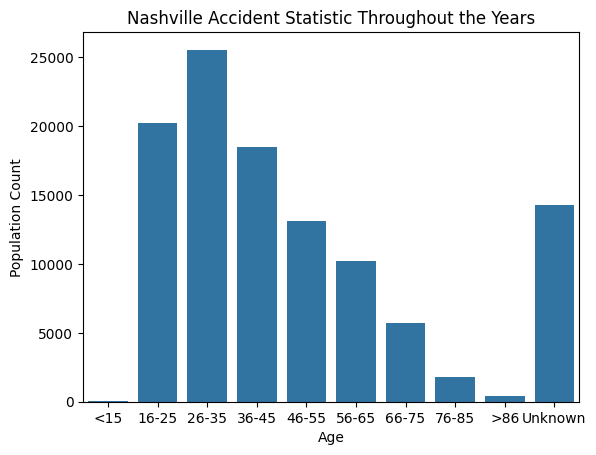

In [ ]:
sns.countplot(data=AC, x= "Age")
plt.ylabel('Population Count')
plt.title("Nashville Accident Statistic Throughout the Years")

In [ ]:
dc = AC['Condition'].value_counts()
print(dc)

Condition
Appeared Normal                         67779
Unknown                                 16322
Under the Influence Drugs/Alcohol        2282
Apparently Fatigued                       383
Other                                     381
Apparently Asleep                         269
Illegal Drug Use                          260
Ill Sick                                  148
Emotional Depression Angry Disturbed      112
Physical Impairment Narrative             103
Reaction To Drugs Medication               42
Driverless                                 16
Failure To Take Drugs Medication           16
Name: count, dtype: int64


Text(0.5, 1.0, 'Drivers Symtoms While on the Road')

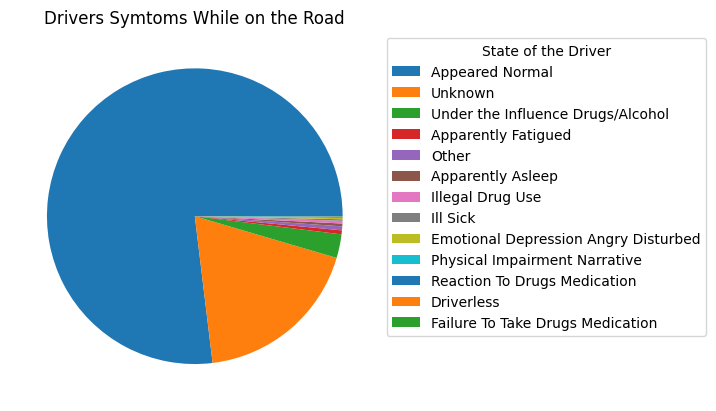

In [ ]:
# Create list here
Day =["Appeared Normal", "Unknown", "Under the Influence Drugs/Alcohol", "Apparently Fatigued", "Other",
      "Apparently Asleep","Illegal Drug Use","Ill Sick", "Emotional Depression Angry Disturbed","Physical Impairment Narrative",
      "Reaction To Drugs Medication","Driverless","Failure To Take Drugs Medication"]

# Create counts list here
Counts= dc

plt.pie(Counts)
plt.legend(Day, bbox_to_anchor=(1.0, 1.0), loc='upper left',title='State of the Driver')
plt.title("Drivers Symtoms While on the Road")

In [24]:
w = TA['Weather Description'].value_counts()
print(w)

Weather Description
CLEAR                     52741
CLOUDY                    12408
RAIN                       8559
UNKNOWN                     799
SNOW                        477
FOG                         154
SLEET, HAIL                  79
OTHER (NARRATIVE)            43
BLOWING SNOW                 39
SEVERE CROSSWIND             17
SMOG, SMOKE                  13
BLOWING SAND/SOIL/DIRT        2
Name: count, dtype: int64


Text(0.5, 1.0, 'Weather Over the Years in Nashville')

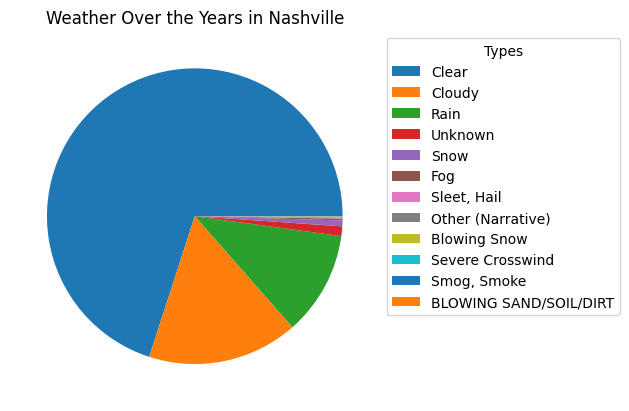

In [25]:
# Create list here
Day =["Clear", "Cloudy", "Rain", "Unknown", "Snow", "Fog","Sleet, Hail","Other (Narrative)",
      "Blowing Snow","Severe Crosswind","Smog, Smoke","BLOWING SAND/SOIL/DIRT"]

# Create counts list here
Counts= w

plt.pie(Counts)
plt.legend(Day, bbox_to_anchor=(1.0, 1.0), loc='upper left',title='Types')
plt.title("Weather Over the Years in Nashville")

In [ ]:
TA["Date and Time"].value_counts()

Date and Time
10/30/22 0:00    14
2/14/21 0:00     13
2/23/20 0:00     12
5/12/23 0:00     12
5/21/22 0:00     12
                 ..
5/15/21 0:36      1
5/15/21 0:50      1
5/15/21 1:20      1
5/15/21 2:00      1
6/2/24 17:30      1
Name: count, Length: 73846, dtype: int64

In [ ]:
ratings = TA['Date and Time']
print(ratings)

0         1/1/20 0:00
1         1/1/20 0:00
2         1/1/20 0:00
3         1/1/20 0:00
4         1/1/20 0:25
             ...     
81234    6/2/24 12:30
81235    6/2/24 14:11
81236    6/2/24 14:50
81237    6/2/24 15:11
81238    6/2/24 17:30
Name: Date and Time, Length: 81239, dtype: object


Text(0.5, 1.0, 'Which Months have the most accidents')

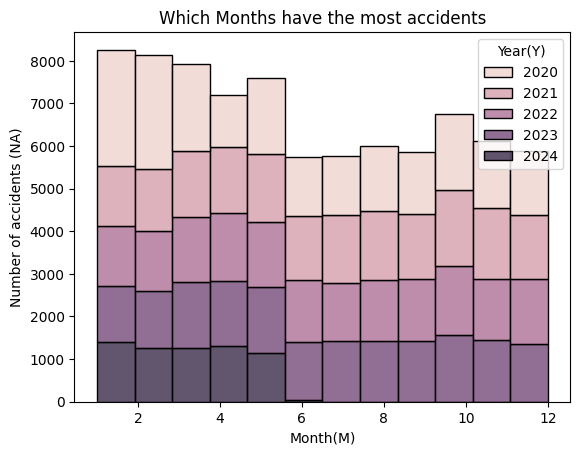

In [ ]:
sns.histplot(data=DT,x="Month(M)",hue="Year(Y)",bins=12,multiple='stack')
plt.ylabel('Number of accidents (NA)')

plt.title("Which Months have the most accidents")

In [ ]:
TA['Latitude']

0        36.1129
1        36.0610
2        36.0198
3        36.0514
4        36.1750
          ...   
81234    36.2522
81235    36.0521
81236    36.1523
81237    36.1284
81238    36.2059
Name: Latitude, Length: 81239, dtype: float64

In [ ]:
TA['Longitude']

0       -86.6890
1       -86.6807
2       -86.6570
3       -86.7018
4       -86.7894
          ...   
81234   -86.7852
81235   -86.6709
81236   -86.8409
81237   -86.8031
81238   -86.7686
Name: Longitude, Length: 81239, dtype: float64

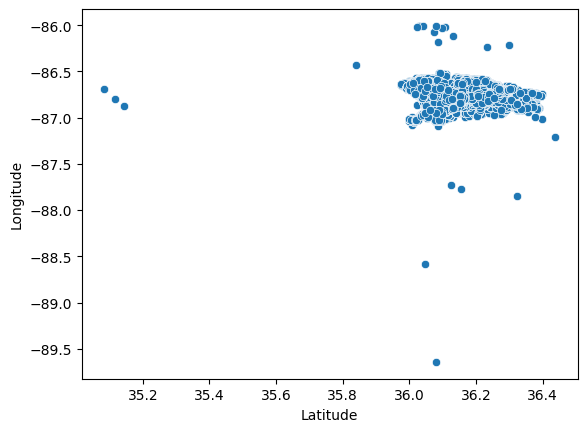

In [ ]:
sns.scatterplot(data=TA,x='Latitude',y='Longitude');

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

In [ ]:
import folium


from folium.plugins import HeatMap
TA = TA.sample(int(0.001 * len(TA)))
lat_lon_pairs = list(zip(list(TA.Latitude), list(TA.Longitude)))

map = folium.Map(location=[36.174465, -86.767960], zoom_start = 12)

HeatMap(lat_lon_pairs).add_to(map)
display(map)